In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [5]:
df = pd.read_csv("fmnist_small.csv")
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(6000, 785)

In [7]:
df.size

4710000

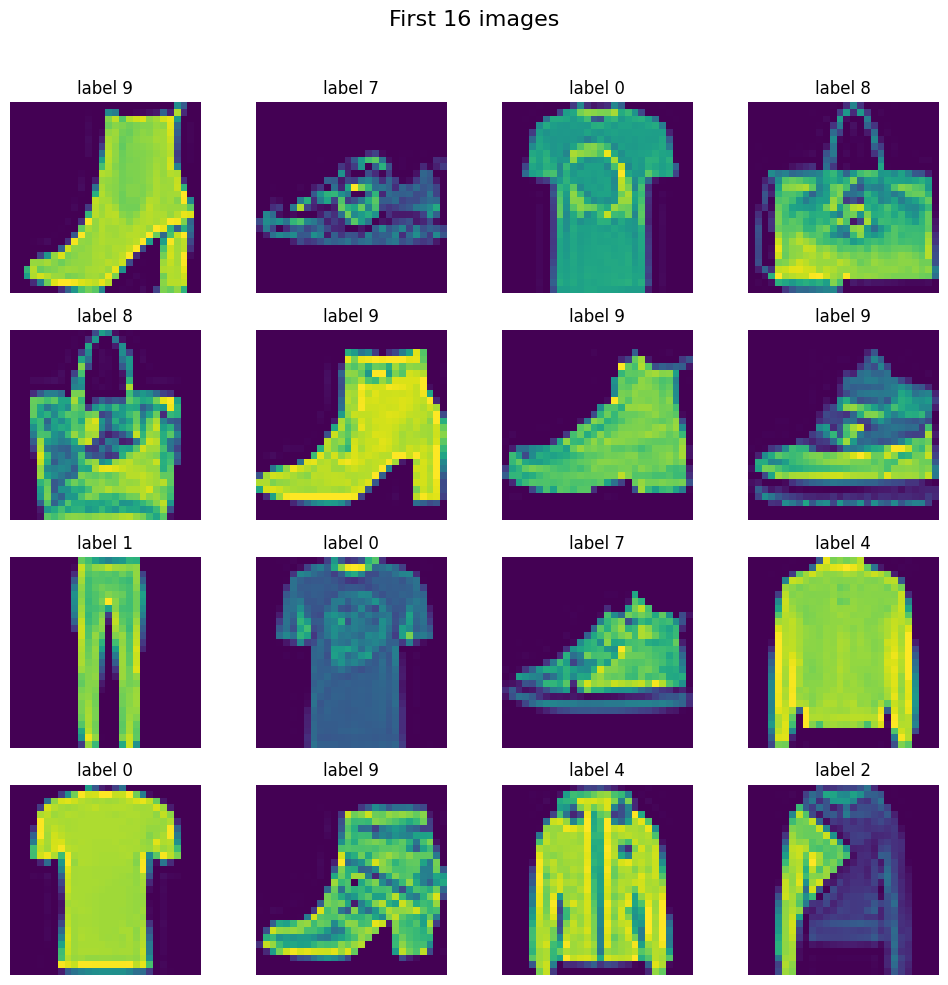

In [8]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("First 16 images",fontsize=16)

for i, ax in enumerate(axes.flat):
	img = df.iloc[i,1:].values.reshape(28,28)
	ax.imshow(img)
	ax.axis("off")
	ax.set_title(f'label {df.iloc[i,0]}')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
X,Y

(      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0          0       0       0       0       0       0       0       0       0   
 1          0       0       0       0       0       0       0       0       0   
 2          0       0       0       0       0       1       0       0       0   
 3          0       0       0       0       0       0       0       0       0   
 4          0       0       0       0       0       0       0       0       0   
 ...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 5995       0       0       0       0       0       0       0       0       0   
 5996       0       0       0       0       0       0       0       0       0   
 5997       0       0       0       0       0       0       0       0       0   
 5998       0       0       0       0       0       0       0       0       0   
 5999       0       0       0       0       0       0       0       0       0   
 
       pixel10  ...  pixel

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4800, 784), (1200, 784), (4800,), (1200,))

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

## Create Dataset class

In [12]:
class my_dataset(Dataset):
	def __init__(self, features, label):
		self.features = features
		self.label = label
		self.features = torch.tensor(self.features, dtype=torch.float32)
		self.label = torch.tensor(self.label, dtype = torch.long)
	

	def __len__(self):
		return len(self.features)
		
	
	def __getitem__(self,index):
		return self.features[index], self.label[index]

In [13]:
X_train.values

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]], shape=(4800, 784))

In [14]:
train_dataset = my_dataset(X_train.values, y_train)
len(train_dataset)

4800

In [15]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [16]:
X_test.values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2       , 0.        ,
        0.        ]], shape=(1200, 784))

In [17]:
y_test.values

array([7, 0, 5, ..., 7, 1, 2], shape=(1200,))

In [18]:
test_dataset = my_dataset(X_test.values, y_test.values)
test_dataset

In [19]:
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
train_loader

In [21]:
test_loader

In [22]:
class my_model(nn.Module):

	def __init__(self, num_features):
		super().__init__()
		self.model = nn.Sequential(
			nn.Linear(num_features,128),
			nn.ReLU(),
			nn.Linear(128,64),
			nn.ReLU(),
			nn.Linear(64,10)
		)

	def forward(self,x):
		return self.model(x)


In [23]:
learning_rate = 0.1
epochs = 100

In [24]:
## Define Model
model = my_model(X_train.shape[1])

## Loss Function 
criterion = nn.CrossEntropyLoss()

## Optimizer 
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

optimizer


SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
## Training Loop

for epoch in range(epochs):
	total_epochs_loss = 0
	for batch_features, batch_label in train_loader:

		## Forward Pass
		output = model(batch_features)

		## Loss
		losses = criterion(output, batch_label)
        
		optimizer.zero_grad()
		losses.backward()

		## Back Pass
		optimizer.step()

		total_epochs_loss += losses.item()
	
	avg_batch_losses = (total_epochs_loss)/len(train_loader)
	print(avg_batch_losses)
	


1.3216368520259858
0.7793365579843521
0.6427524695793788
0.5751657489935557
0.5281801910201709
0.4952874990304311
0.46024329950412113
0.43594589988390603
0.4182921428481738
0.3984092238545418
0.38502645591894785
0.372268552283446
0.34773620883623757
0.34672420596083003
0.31388126537203787
0.31264611408114434
0.2955209298928579
0.28571509405970574
0.27084775634109975
0.26237100263436636
0.25756084914008776
0.24232647344470024
0.2395794931302468
0.22613244988024234
0.22336848246554533
0.213457190990448
0.21694445793827374
0.2088823829839627
0.18397820924719174
0.18893054623156785
0.18644972475866475
0.19254937909543515
0.17726791309813658
0.17029848720878363
0.15780573147038618
0.17247499639789263
0.15835882760584355
0.15262670433769623
0.14078825332224368
0.13741421453189104
0.13880946194132168
0.1352310222759843
0.13245717504993082
0.1142906424527367
0.11388790868533154
0.11738410521298646
0.1155016428977251
0.12205745562290152
0.09441445252547662
0.10300676849670708
0.0875724792387336

In [26]:
## model evaluation
model.eval()

my_model(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [27]:
## Evalution code 

total = 0 
correct = 0 

with torch.no_grad():

	for batch_features, batch_label in test_loader:
		out = model(batch_features)
		# print(out)
		# print(f"Returned Values : {torch.max(out,1)}")
		_, predicted = torch.max(out,1)

		total += batch_label.shape[0]

		correct += (predicted==batch_label).sum().item()
	print(correct/total)

0.8175


In [28]:
len(test_loader)

38

## Evaluate in training data

In [29]:
train_loader

In [33]:
## training data evaluation

total = 0 
correct = 0 

with torch.no_grad():

	for batch_features, batch_label in train_loader:
		out = model(batch_features)
		print(out)
		print(f"Returned Values : {torch.max(out,1)}")
		_, predicted = torch.max(out,1)

		total += batch_label.shape[0]

		correct += (predicted==batch_label).sum().item()
	print(correct/total)

tensor([[-7.3538e+00,  2.6680e+00, -1.0856e+01,  3.0663e+00,  2.2976e+00,
          1.0097e+01, -2.1364e+01,  2.7024e+01,  5.3315e+00, -7.2767e+00],
        [-1.5661e+00, -7.3369e-01,  9.1963e+00, -4.2040e+00,  6.6706e+00,
         -4.3583e+00,  5.4988e+00, -4.6815e+00, -3.8306e+00, -3.3602e+00],
        [ 2.9682e+00,  9.2565e-01, -2.3616e+00, -1.9570e+01,  5.7564e-01,
         -6.4839e+00,  1.2874e+00, -2.2486e+00,  2.7920e+01, -4.3606e+00],
        [-7.2941e+00, -2.0142e+00, -1.3629e+01, -2.9210e+00, -5.7641e+00,
          3.7226e+00, -1.3980e+00,  5.8021e+00, -3.6911e+00,  2.2509e+01],
        [-3.7221e+00, -1.6177e+00, -7.6541e+00, -5.2418e+00, -5.2471e+00,
          2.3347e+00, -1.8282e+00,  6.3190e+00,  1.6921e+00,  1.2640e+01],
        [ 5.2874e+00,  3.7899e+01,  1.3066e+01, -3.8855e+00,  1.1578e+01,
         -1.8139e+01, -2.3232e+01, -6.3252e+00, -9.8103e+00, -1.1006e+01],
        [-5.9423e+00,  5.5606e-01,  1.1680e+01, -1.0769e+01,  1.3995e+01,
         -6.3992e+00,  1.2232e+0

In [31]:
## Improve accuracy :
### use more data
### Different Optimizers
### Learning Rate
### Epoches 
### weight_initializer
### hyperparameter  